In [1]:
import pandas as pd 
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('recoverd_param_lerch_voss_mean_median.csv')

In [3]:
df.insert(3, "v_total = v2 - v1", df['v1_mean']-df['v2_mean'], True)


In [4]:
df.insert(4, "v_bias = v2 + v1", df['v1_mean']+df['v2_mean'], True)


In [5]:
#df.to_csv('with_total_bias_recoverd_param_lerch_voss_mean_median.csv',index=False)


In [6]:
df

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
0,3024_class_words_part_1.dat,2.775302,-1.843634,4.618935,0.931668,0.488304,1.286637,0.491423,0.020234,1.939520,2.773315,-1.846082,0.488600,1.281603,0.491504,0.019269,1.949172
1,1025_class_words_part_2.dat,3.951487,-3.030869,6.982357,0.920618,0.460097,1.024971,0.444822,-0.005482,1.973413,3.954950,-3.037287,0.458662,1.018384,0.445139,-0.005015,1.982923
2,1011_class_pictures_part_1.dat,1.094287,-2.053254,3.147541,-0.958966,0.453859,0.842740,0.664780,0.071449,1.680715,1.091987,-2.045152,0.454633,0.854842,0.665247,0.072577,1.714519
3,017_class_pictures_part_1.dat,1.991843,-3.771075,5.762918,-1.779232,0.528398,1.331145,0.578720,0.009057,1.953899,1.983995,-3.763898,0.527143,1.319353,0.579576,0.009263,1.964867
4,1004_class_pictures_part_1.dat,1.695352,-1.766107,3.461459,-0.070756,0.480083,1.414699,0.578250,0.005018,1.988156,1.686150,-1.760669,0.480401,1.408314,0.578744,0.006036,1.997333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2005_class_pictures_part_1.dat,2.135326,-2.062411,4.197737,0.072915,0.469826,1.455127,0.596721,-0.002554,1.931114,2.137020,-2.062913,0.469075,1.444680,0.597516,-0.002212,1.940250
410,1023_class_pictures_part_1.dat,3.307016,-3.484820,6.791837,-0.177804,0.474430,1.509676,0.579413,0.004299,1.862007,3.292227,-3.468304,0.473009,1.448166,0.583168,0.004180,1.879247
411,4012_class_pictures_part_1.dat,2.051275,-1.920975,3.972249,0.130300,0.456702,1.345215,0.487066,-0.000880,1.877587,2.047991,-1.912331,0.456495,1.335037,0.487524,0.000836,1.889739
412,4012_class_pictures_part_2.dat,1.925139,-3.061887,4.987026,-1.136749,0.538818,1.016065,0.486288,0.024233,1.820477,1.916742,-3.052243,0.538277,1.013394,0.486856,0.023971,1.850107


In [7]:
#consider one task in two session 
df_word_part_1 = df[df['Experiment'].str.contains('class_words_part_1.')]
df_word_part_2 = df[df['Experiment'].str.contains('class_words_part_2.')]
df_word_part_2

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
1,1025_class_words_part_2.dat,3.951487,-3.030869,6.982357,0.920618,0.460097,1.024971,0.444822,-0.005482,1.973413,3.954950,-3.037287,0.458662,1.018384,0.445139,-0.005015,1.982923
5,1018_class_words_part_2.dat,3.360191,-3.584459,6.944650,-0.224269,0.482108,1.117019,0.405339,0.008633,1.885269,3.359973,-3.594615,0.482256,1.094942,0.406955,0.008391,1.902093
9,015_class_words_part_2.dat,3.446490,-1.848041,5.294531,1.598449,0.415943,1.002249,0.478555,0.038355,1.862269,3.437391,-1.844863,0.414114,1.002661,0.477843,0.039317,1.890340
11,3010_class_words_part_2.dat,2.455586,-2.114053,4.569640,0.341533,0.456239,1.255504,0.474685,0.019157,1.776603,2.448975,-2.114396,0.456124,1.245490,0.475554,0.017961,1.788096
16,4003_class_words_part_2.dat,2.839096,-2.042980,4.882076,0.796117,0.424880,1.516963,0.427641,-0.010168,1.962924,2.834547,-2.035219,0.424289,1.509583,0.428540,-0.009152,1.969847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,4008_class_words_part_2.dat,2.517413,-2.120542,4.637955,0.396872,0.399939,1.128729,0.455439,0.000312,1.900248,2.510971,-2.115663,0.399848,1.126629,0.455859,0.000911,1.913137
392,011_class_words_part_2.dat,3.417087,-3.512803,6.929889,-0.095716,0.523265,0.928501,0.423286,0.029133,1.928164,3.414172,-3.510842,0.522699,0.923518,0.423390,0.029788,1.950201
398,1001_class_words_part_2.dat,2.606744,-2.491403,5.098148,0.115341,0.528677,1.192374,0.401000,0.019972,1.849441,2.593921,-2.491867,0.529706,1.184400,0.400958,0.018848,1.867094
403,019_class_words_part_2.dat,1.985271,-1.739957,3.725228,0.245314,0.462660,1.291128,0.390968,0.004701,1.856697,1.974450,-1.743259,0.462917,1.291613,0.391641,0.004620,1.866488


In [8]:
df_word_part_1=df_word_part_1.sort_values('Experiment')

In [9]:
df_word_part_2=df_word_part_2.sort_values('Experiment')

In [10]:
corr_frame = pd.DataFrame()
data = {'Experiment':df_word_part_1['Experiment'],'v1_mean_part_1':np.array(df_word_part_1['v1_mean']),'v1_mean_part_2':np.array(df_word_part_2['v1_mean'])}
#corr_frame = pd.DataFrame(data,columns=['v1_mean_part_1', 'v1_mean_part_2'])
#corr_frame['v1_mean_part_1']=df_word_part_1['v1_mean']
#data
corr_data = pd.DataFrame(data)

In [11]:
corr_data

,Experiment,v1_mean_part_1,v1_mean_part_2
368,001_class_words_part_1.dat,1.932449,1.836586
108,002_class_words_part_1.dat,2.702269,3.120898
347,003_class_words_part_1.dat,3.536402,3.032153
97,004_class_words_part_1.dat,2.840207,2.106693
62,005_class_words_part_1.dat,3.629910,4.021148
...,...,...,...
393,4009_class_words_part_1.dat,1.950321,2.035931
242,4010_class_words_part_1.dat,2.728556,2.771703
176,4011_class_words_part_1.dat,2.009517,1.966102
341,4012_class_words_part_1.dat,2.799609,2.749953


In [12]:
import pandas as pd
import scipy.linalg as sp
import numpy as np
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = corr_data[['v1_mean_part_1', 'v1_mean_part_2']]
df_x['mahala'] = mahalanobis(x=df_x, data=corr_data[['v1_mean_part_1', 'v1_mean_part_2']])
df_x

,v1_mean_part_1,v1_mean_part_2,mahala
368,1.932449,1.836586,2.915949
108,2.702269,3.120898,1.098566
347,3.536402,3.032153,2.814663
97,2.840207,2.106693,3.336254
62,3.629910,4.021148,3.250118
...,...,...,...
393,1.950321,2.035931,2.643701
242,2.728556,2.771703,0.054503
176,2.009517,1.966102,2.375345
341,2.799609,2.749953,0.025535


In [13]:
# Critical values for two degrees of freedom
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)
#> 9.21

13.815510557964274

In [14]:
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
df_without_outlier=df_x.loc[df_x.p_value < 0.001]

In [15]:
df_without_outlier

,v1_mean_part_1,v1_mean_part_2,mahala,p_value


In [16]:
x = df_x['v1_mean_part_1']
y = df_x['v1_mean_part_2']
from scipy.stats.stats import pearsonr

corr = pearsonr(x, y)
corr

/tmp/ipykernel_263509/2239973181.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.7860958157468968, pvalue=4.862733039957549e-23)

In [17]:
np.shape(corr)
corr[0]

0.7860958157468968

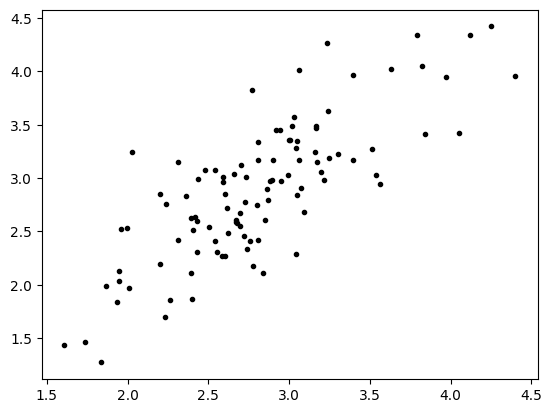

In [18]:
#plt.style.use('_mpl-gallery')

np.random.seed(3)
plt.plot(x, y, '.', color='black');

In [19]:
for column in df_word_part_1:
    print (column)

Experiment
v1_mean
v2_mean
v_total = v2 - v1
v_bias = v2 + v1
zr_mean
a_mean
ndt_mean
sndt_mean
alpha_mean
v1_median
v2_median
zr_median
a_median
ndt_median
sndt_median
alpha_median


/tmp/ipykernel_263509/3328817058.py:15: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


v1_mean Index([], dtype='int64') 0.786*** 0.0
v2_mean Index([14, 177], dtype='int64') 0.757*** 0.0


/tmp/ipykernel_263509/3328817058.py:67: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/tmp/ipykernel_263509/3328817058.py:67: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


zr_mean Index([177], dtype='int64') 0.568*** 0.0
a_mean Index([397, 393], dtype='int64') 0.79*** 0.0


/tmp/ipykernel_263509/3328817058.py:67: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/tmp/ipykernel_263509/3328817058.py:67: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


ndt_mean Index([12], dtype='int64') 0.559*** 0.0
sndt_mean Index([256, 397, 356], dtype='int64') 0.732*** 0.0


/tmp/ipykernel_263509/3328817058.py:67: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/tmp/ipykernel_263509/3328817058.py:67: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


alpha_mean Index([12, 101, 186], dtype='int64') 0.612*** 0.0
v_total = v2 - v1 Index([], dtype='int64') 0.866*** 0.0


/tmp/ipykernel_263509/3328817058.py:67: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/tmp/ipykernel_263509/3328817058.py:67: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


v_bias = v2 + v1 Index([177], dtype='int64') 0.501*** 0.0


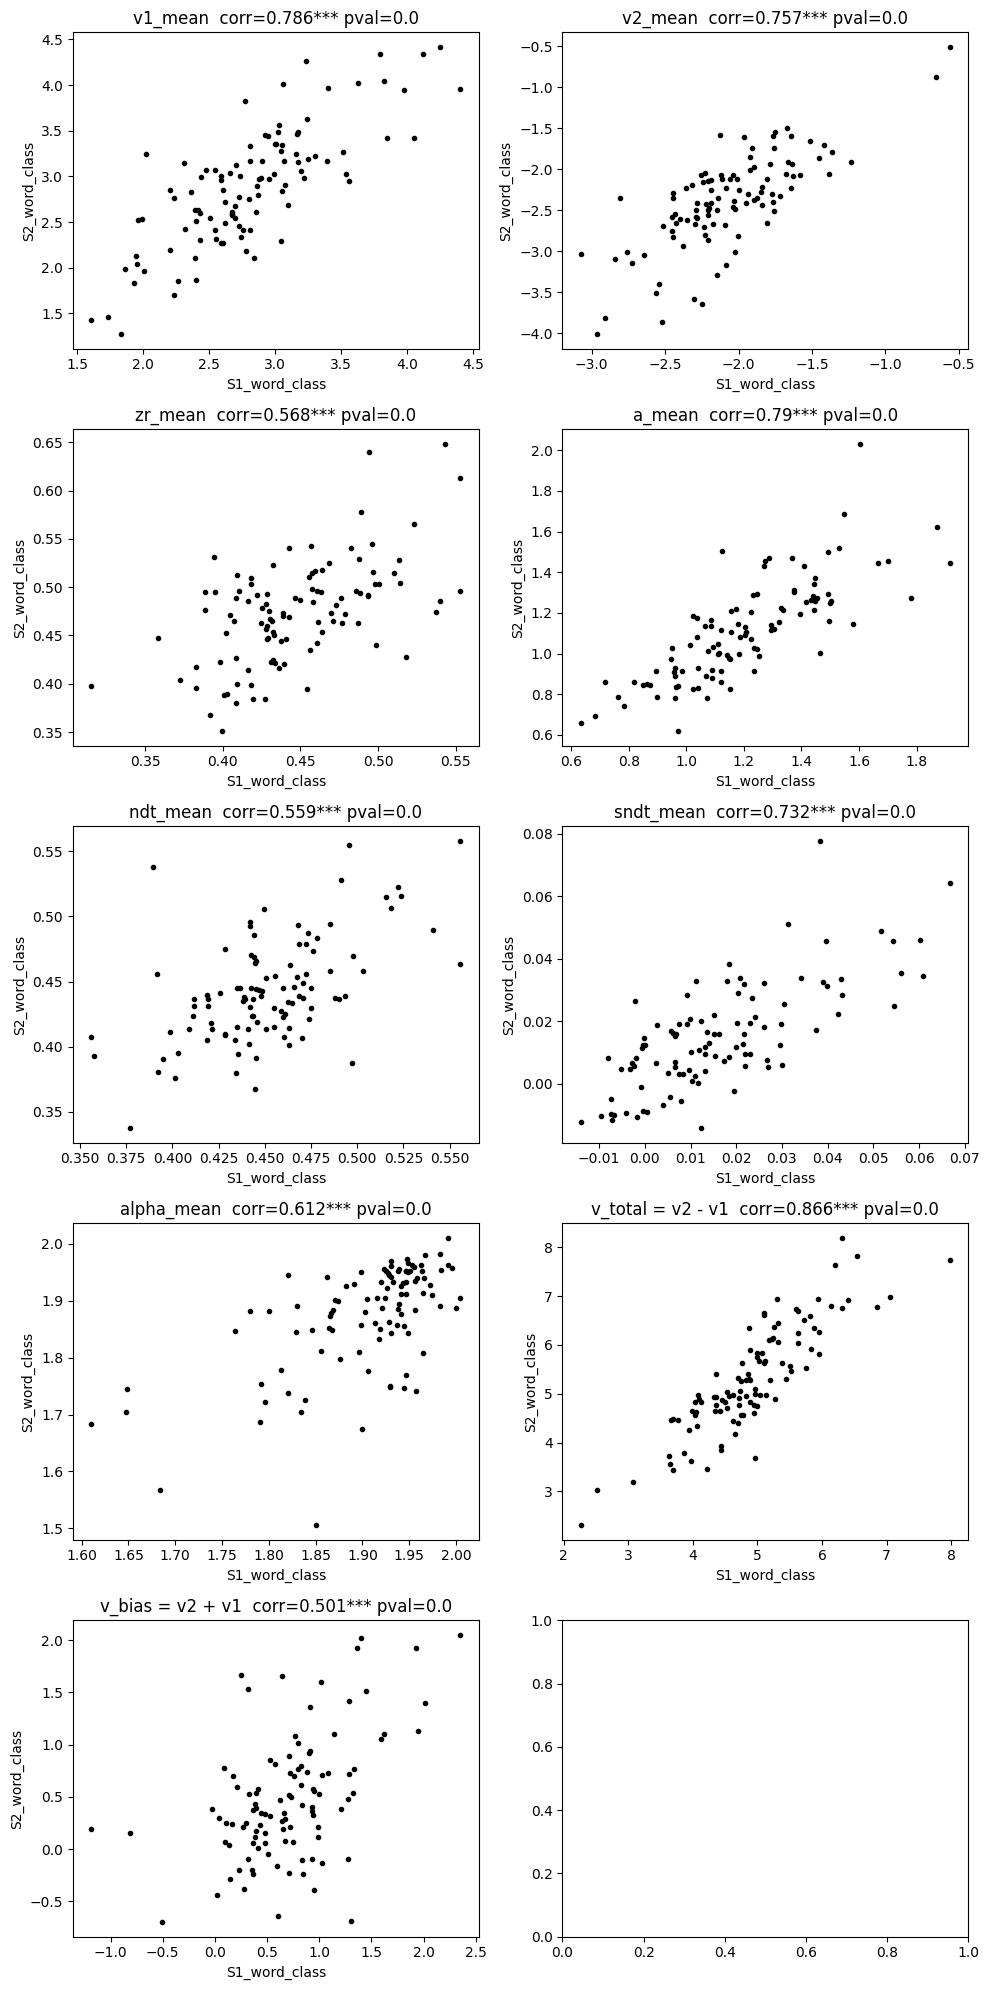

In [24]:
params_mean=['v1_mean','v2_mean','zr_mean','a_mean','ndt_mean','sndt_mean','alpha_mean','v_total = v2 - v1','v_bias = v2 + v1']
#corr_frame = pd.DataFrame()
#corr_frame['Experiment']=df_word_part_1['Experiment']
final_corr_frame = pd.DataFrame()
final_corr_frame['Experiment']=['class_words']
final_corr_frame['corr_type']=['between session']

final_corr_dict = {}
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)

fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(10, 20))
axs = axs.flatten()
a=0 
from scipy.stats.stats import pearsonr

for param in params_mean:
    corr_frame = pd.DataFrame()
    par_1='param_1_'+str(param)
    par_2='param_2_'+str(param)
    data_analysis = {'Experiment':df_word_part_1['Experiment'],par_1:np.array(df_word_part_1[param]),par_2:np.array(df_word_part_2[param])}
    corr_frame = pd.DataFrame(data_analysis)    
    df_x = corr_frame[[par_1, par_2]]
    df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[[par_1, par_2]])
    df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
    df_outliers=df_x.loc[df_x.p_value < 0.001]
    ind=df_outliers.index
#drop the outliers with index     
    corr_without_outlier = corr_frame.drop(ind)
    x = corr_without_outlier[par_1]
    y = corr_without_outlier[par_2]
    #corr =  np.corrcoef(x, y)[0,1]
    #corr =round(corr,3)
    corrcoef_pval =pearsonr(x,y)
    corr = corrcoef_pval[0]
    corr =round(corr,3)
    pvalue=corrcoef_pval[1]
    pvalue =round(pvalue,5)
    if pvalue < 0.001 :
        corr = str(corr)+'***'
    elif pvalue < 0.01 :
        corr = str(corr)+'**'
    elif pvalue < 0.05 :
        corr = str(corr)+'*'
  

    print(param,ind,corr,pvalue)

    axs[a].plot(x, y,'.',color='black')
    axs[a].set_title(param+'  corr='+str(corr)+' pval='+str(pvalue))
    axs[a].set_xlabel('S1_word_class')
    axs[a].set_ylabel('S2_word_class')
    
    
    #ax.set_xlabel(param)
    #axs[a].set_xlabel(param)
    
    a+=1
    #plt.title('corr ='+str(corr))
    #plt.xlabel('Session_1_pic_class')
    #plt.ylabel('Session_2_pic_class')
    #plt.savefig("./{}.png".format(param))
    #plt.show()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')
    fig.tight_layout()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')

    final_corr_frame['corr_'+str(param)] = [corr]

#saving the results 
fig.savefig("./Study1_retest_word_s1s2_corr_.png", dpi=600, bbox_inches='tight')

#saving the results 

final_corr_frame.to_csv('corr_between_session_word_class.csv',index=False)
 
    


In [25]:
type(corr)

str

In [26]:
final_corr_frame.to_excel("restest_corr_betw_s1s2_word.xlsx")

final_corr_frame

,Experiment,corr_type,corr_v1_mean,corr_v2_mean,corr_zr_mean,corr_a_mean,corr_ndt_mean,corr_sndt_mean,corr_alpha_mean,corr_v_total = v2 - v1,corr_v_bias = v2 + v1
0,class_words,between session,0.786***,0.757***,0.568***,0.79***,0.559***,0.732***,0.612***,0.866***,0.501***


In [27]:
df = pd.read_csv('with_total_bias_recoverd_param_lerch_voss_mean_median.csv')

In [24]:
df

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
0,3024_class_words_part_1.dat,2.775302,-1.843634,4.618935,0.931668,0.488304,1.286637,0.491423,0.020234,1.939520,2.773315,-1.846082,0.488600,1.281603,0.491504,0.019269,1.949172
1,1025_class_words_part_2.dat,3.951487,-3.030869,6.982357,0.920618,0.460097,1.024971,0.444822,-0.005482,1.973413,3.954950,-3.037287,0.458662,1.018384,0.445139,-0.005015,1.982923
2,1011_class_pictures_part_1.dat,1.094287,-2.053254,3.147541,-0.958966,0.453859,0.842740,0.664780,0.071449,1.680715,1.091987,-2.045152,0.454633,0.854842,0.665247,0.072577,1.714519
3,017_class_pictures_part_1.dat,1.991843,-3.771075,5.762918,-1.779232,0.528398,1.331145,0.578720,0.009057,1.953899,1.983995,-3.763898,0.527143,1.319353,0.579576,0.009263,1.964867
4,1004_class_pictures_part_1.dat,1.695352,-1.766107,3.461459,-0.070756,0.480083,1.414699,0.578250,0.005018,1.988156,1.686150,-1.760669,0.480401,1.408314,0.578744,0.006036,1.997333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2005_class_pictures_part_1.dat,2.135326,-2.062411,4.197737,0.072915,0.469826,1.455127,0.596721,-0.002554,1.931114,2.137020,-2.062913,0.469075,1.444680,0.597516,-0.002212,1.940250
410,1023_class_pictures_part_1.dat,3.307016,-3.484820,6.791837,-0.177804,0.474430,1.509676,0.579413,0.004299,1.862007,3.292227,-3.468304,0.473009,1.448166,0.583168,0.004180,1.879247
411,4012_class_pictures_part_1.dat,2.051275,-1.920975,3.972249,0.130300,0.456702,1.345215,0.487066,-0.000880,1.877587,2.047991,-1.912331,0.456495,1.335037,0.487524,0.000836,1.889739
412,4012_class_pictures_part_2.dat,1.925139,-3.061887,4.987026,-1.136749,0.538818,1.016065,0.486288,0.024233,1.820477,1.916742,-3.052243,0.538277,1.013394,0.486856,0.023971,1.850107


# class_pictures

In [28]:
df = pd.read_csv('with_total_bias_recoverd_param_lerch_voss_mean_median.csv')

In [29]:
#consider one task in two session 
df_class_pictures_1 = df[df['Experiment'].str.contains('class_pictures_part_1.')]
df_class_pictures_2 = df[df['Experiment'].str.contains('class_pictures_part_2.')]
df_class_pictures_2

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
6,1011_class_pictures_part_2.dat,1.409906,-1.430717,2.840623,-0.020811,0.436890,0.844376,0.565796,0.023683,1.855786,1.399252,-1.427297,0.436428,0.853344,0.565436,0.023254,1.891331
7,2001_class_pictures_part_2.dat,2.355215,-3.068417,5.423632,-0.713202,0.429553,1.733667,0.482378,-0.018847,1.926423,2.361521,-3.065664,0.428795,1.710330,0.484033,-0.016834,1.938436
8,1021_class_pictures_part_2.dat,3.769519,-4.271465,8.040984,-0.501946,0.526903,1.536785,0.514159,-0.001350,1.932137,3.767855,-4.279574,0.527690,1.488121,0.517486,-0.000596,1.946822
13,4004_class_pictures_part_2.dat,2.649170,-2.447861,5.097031,0.201309,0.379803,0.878839,0.549753,0.044565,1.871035,2.630341,-2.446404,0.377348,0.881098,0.549165,0.045739,1.908254
19,1020_class_pictures_part_2.dat,2.810569,-2.617663,5.428232,0.192906,0.412678,1.450432,0.530735,-0.010985,1.960156,2.802544,-2.611174,0.412003,1.435714,0.531001,-0.009736,1.972100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,3003_class_pictures_part_2.dat,2.701279,-2.419092,5.120371,0.282187,0.396712,1.311340,0.475290,0.002356,1.933283,2.692130,-2.399817,0.395466,1.299897,0.476316,0.002216,1.947111
402,011_class_pictures_part_2.dat,3.144268,-3.482547,6.626816,-0.338279,0.476706,1.122345,0.506245,0.002098,1.954782,3.144879,-3.481964,0.474939,1.108281,0.507790,0.002440,1.966351
407,3017_class_pictures_part_2.dat,3.423025,-1.718984,5.142010,1.704041,0.402474,0.955970,0.649394,0.029466,1.994821,3.390215,-1.705097,0.400023,0.954516,0.649191,0.029335,2.004639
412,4012_class_pictures_part_2.dat,1.925139,-3.061887,4.987026,-1.136749,0.538818,1.016065,0.486288,0.024233,1.820477,1.916742,-3.052243,0.538277,1.013394,0.486856,0.023971,1.850107


In [30]:
df_class_pictures_1=df_class_pictures_1.sort_values('Experiment')
df_class_pictures_2=df_class_pictures_2.sort_values('Experiment')

/tmp/ipykernel_263509/2238012078.py:16: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


Index([258], dtype='int64')
v1_mean Index([258], dtype='int64') 0.664*** 0.0
Index([], dtype='int64')
v2_mean Index([], dtype='int64') 0.718*** 0.0


/tmp/ipykernel_263509/2238012078.py:69: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/tmp/ipykernel_263509/2238012078.py:69: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


Index([223], dtype='int64')
zr_mean Index([223], dtype='int64') 0.455*** 0.0
Index([149, 64], dtype='int64')
a_mean Index([149, 64], dtype='int64') 0.768*** 0.0


/tmp/ipykernel_263509/2238012078.py:69: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/tmp/ipykernel_263509/2238012078.py:69: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


Index([409], dtype='int64')
ndt_mean Index([409], dtype='int64') 0.535*** 0.0
Index([223], dtype='int64')
sndt_mean Index([223], dtype='int64') 0.486*** 0.0


/tmp/ipykernel_263509/2238012078.py:69: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/tmp/ipykernel_263509/2238012078.py:69: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


Index([409, 327], dtype='int64')
alpha_mean Index([409, 327], dtype='int64') 0.28** 0.00458
Index([258], dtype='int64')
v_total = v2 - v1 Index([258], dtype='int64') 0.786*** 0.0


/tmp/ipykernel_263509/2238012078.py:69: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/tmp/ipykernel_263509/2238012078.py:69: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


Index([], dtype='int64')
v_bias = v2 + v1 Index([], dtype='int64') 0.433*** 0.0


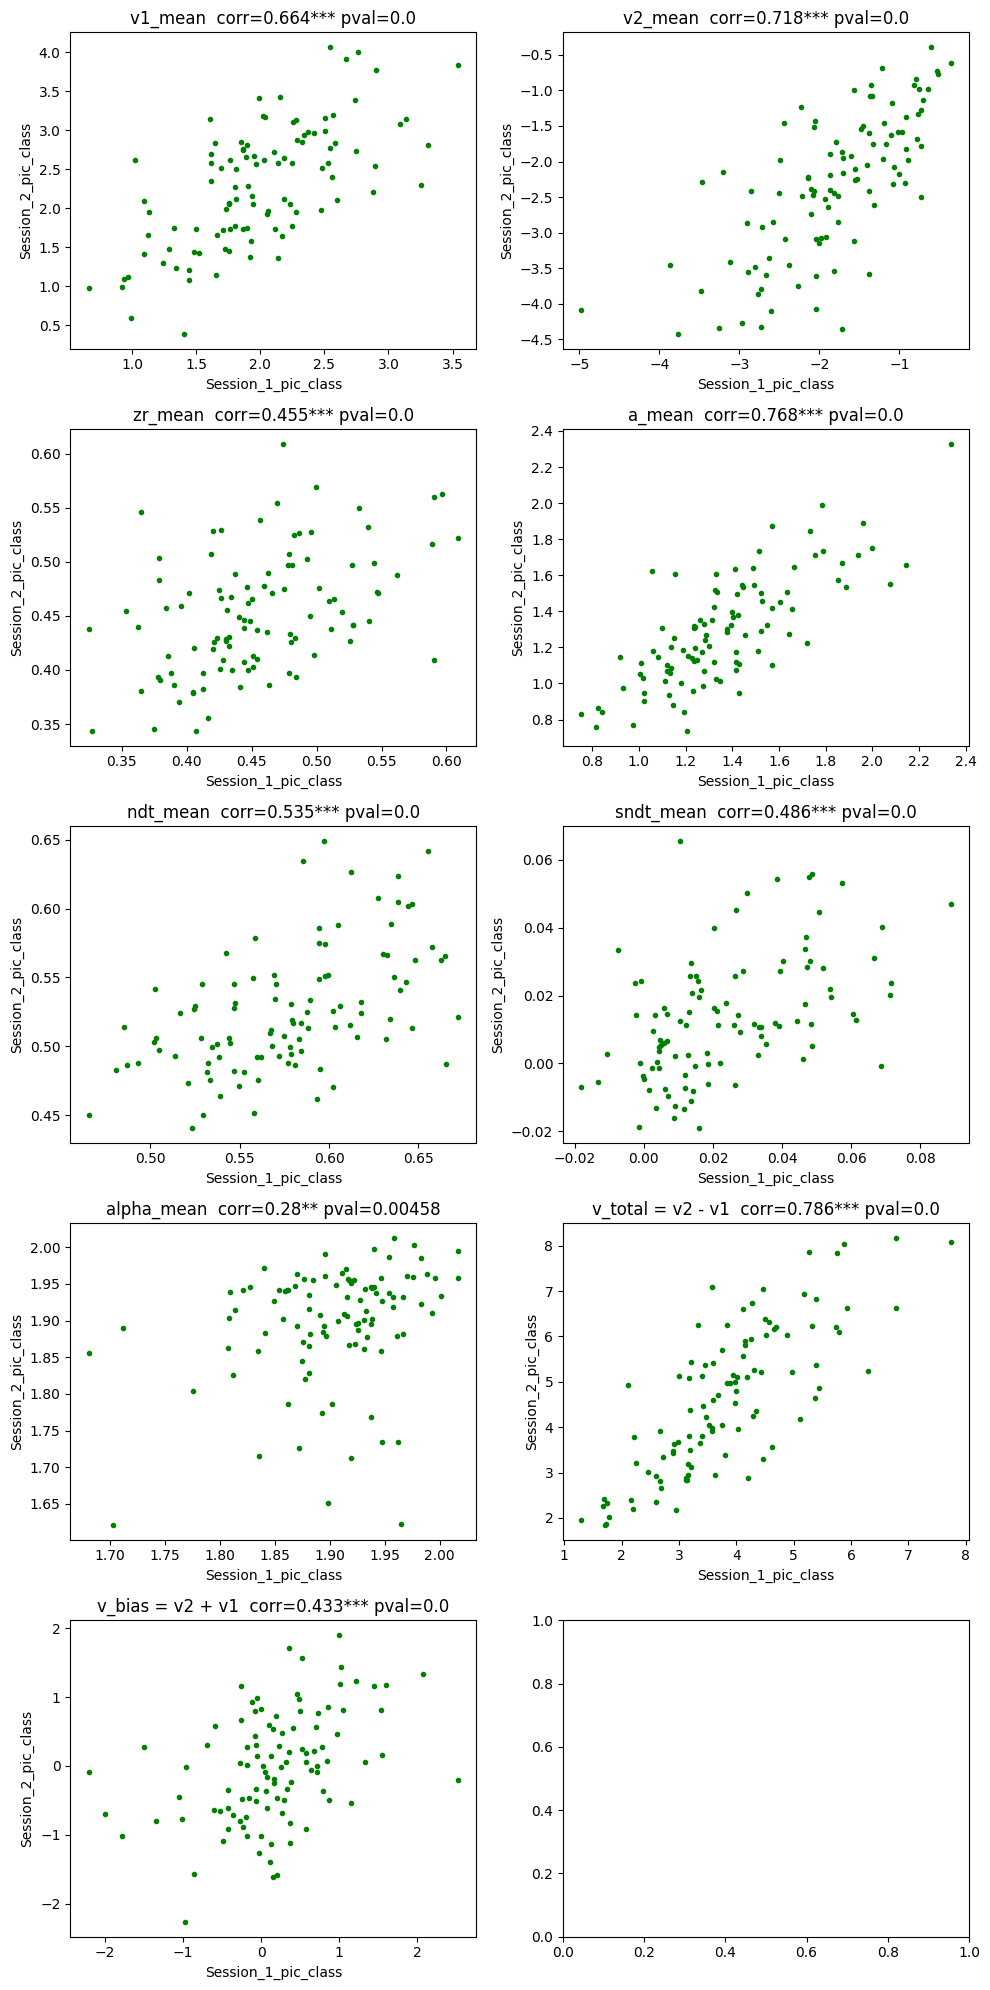

In [34]:
params_mean=['v1_mean','v2_mean','zr_mean','a_mean','ndt_mean','sndt_mean','alpha_mean','v_total = v2 - v1','v_bias = v2 + v1']
#corr_frame = pd.DataFrame()
#corr_frame['Experiment']=df_word_part_1['Experiment']
final_corr_frame = pd.DataFrame()
final_corr_frame['Experiment']=['class_pictures']
final_corr_frame['corr_type']=['between session']

final_corr_dict = {}
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)

fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(10, 20))
axs = axs.flatten()
a=0 

from scipy.stats.stats import pearsonr

for param in params_mean:
    corr_frame = pd.DataFrame()
    par_1='param_1_'+str(param)
    par_2='param_2_'+str(param)
    data_analysis = {'Experiment':df_class_pictures_1['Experiment'],par_1:np.array(df_class_pictures_1[param]),par_2:np.array(df_class_pictures_2[param])}
    corr_frame = pd.DataFrame(data_analysis)    
    df_x = corr_frame[[par_1, par_2]]
    df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[[par_1, par_2]])
    df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
    df_outliers=df_x.loc[df_x.p_value < 0.001]
    ind=df_outliers.index
    print(ind)
#drop the outliers with index     
    corr_without_outlier = corr_frame.drop(ind)
    x = corr_without_outlier[par_1]
    y = corr_without_outlier[par_2]
    #corr =  np.corrcoef(x, y)[0,1]
    #corr =round(corr,3)
    corrcoef_pval =pearsonr(x,y)
    corr = corrcoef_pval[0]
    corr =round(corr,3)
    pvalue=corrcoef_pval[1]
    pvalue =round(pvalue,5)

    if pvalue < 0.001 :
        corr = str(corr)+'***'
    elif pvalue < 0.01 :
        corr = str(corr)+'**'
    elif pvalue < 0.05 :
        corr = str(corr)+'*'
  
    print(param,ind,corr,pvalue)

    axs[a].plot(x, y,'.',color='green')
    axs[a].set_title(param+'  corr='+str(corr)+' pval='+str(pvalue))
    axs[a].set_xlabel('Session_1_pic_class')
    axs[a].set_ylabel('Session_2_pic_class')
    
    
    #ax.set_xlabel(param)
    #axs[a].set_xlabel(param)
    
    a+=1
    #plt.title('corr ='+str(corr))
    #plt.xlabel('Session_1_pic_class')
    #plt.ylabel('Session_2_pic_class')
    #plt.savefig("./{}.png".format(param))
    #plt.show()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')
    fig.tight_layout()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')

    final_corr_frame['corr_'+str(param)] = [corr]

#saving the results 
fig.savefig("./Study1_retest_Picture_s1s2_corr_.png", dpi=600, bbox_inches='tight')

#saving the results 

final_corr_frame.to_csv('corr_between_session_class_pictures.csv',index=False)
 
    


In [36]:
final_corr_frame.to_excel("restest_corr_betw_s1s2_picture.xlsx")

final_corr_frame

,Experiment,corr_type,corr_v1_mean,corr_v2_mean,corr_zr_mean,corr_a_mean,corr_ndt_mean,corr_sndt_mean,corr_alpha_mean,corr_v_total = v2 - v1,corr_v_bias = v2 + v1
0,class_pictures,between session,0.664***,0.718***,0.455***,0.768***,0.535***,0.486***,0.28**,0.786***,0.433***
